In [ ]:
# Not needed as it is the default mode in jupytherHub
# %matplotlib inline

In [ ]:
# import logging
# logger = logging.getLogger()
# logger.setLevel(logging.CRITICAL)

In [ ]:
import logging
logging.getLogger('h5py').setLevel(logging.INFO)
logging.getLogger('matplotlib').setLevel(logging.INFO)

In [ ]:
import sys
import logging

for m in sys.modules:
    logging.getLogger(m).setLevel(logging.INFO)

In [1]:
import sys
sys.path.append("/home/smets/codes/far/PHARE/pyphare/")
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
import numpy as np

In [2]:
path_to_run = "/home/smets/far/farMe/ionBeam/yao/run/yao-01a/"

In [3]:
ls $path_to_run

EM_B.h5               ions_pop_beam_density.h5  ions_pop_main_domain.h5
EM_E.h5               ions_pop_beam_domain.h5   ions_pop_main_flux.h5
ions_bulkVelocity.h5  ions_pop_beam_flux.h5
ions_density.h5       ions_pop_main_density.h5


In [4]:
run = Run(path_to_run)

In [5]:
dir(run)
print(run.available_diags)
run.all_times()

['/home/smets/far/farMe/ionBeam/yao/run/yao-01a/EM_B.h5', '/home/smets/far/farMe/ionBeam/yao/run/yao-01a/EM_E.h5', '/home/smets/far/farMe/ionBeam/yao/run/yao-01a/ions_bulkVelocity.h5', '/home/smets/far/farMe/ionBeam/yao/run/yao-01a/ions_density.h5', '/home/smets/far/farMe/ionBeam/yao/run/yao-01a/ions_pop_beam_density.h5', '/home/smets/far/farMe/ionBeam/yao/run/yao-01a/ions_pop_beam_domain.h5', '/home/smets/far/farMe/ionBeam/yao/run/yao-01a/ions_pop_beam_flux.h5', '/home/smets/far/farMe/ionBeam/yao/run/yao-01a/ions_pop_main_density.h5', '/home/smets/far/farMe/ionBeam/yao/run/yao-01a/ions_pop_main_domain.h5', '/home/smets/far/farMe/ionBeam/yao/run/yao-01a/ions_pop_main_flux.h5']
EM_B
EM_E
ions_bulkVelocity
ions_density
ions_pop_beam_density


KeyError: 'ions_pop_beam_density'

In [6]:
time = 10.

In [7]:
Ni = run.GetNi(time)

In [9]:
for ilvl, lvl in Ni.levels(time).items():
    for patch in lvl.patches:
        print(patch.patch_datas.keys())
        break

dict_keys(['value'])


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x', ylabel='y'>)

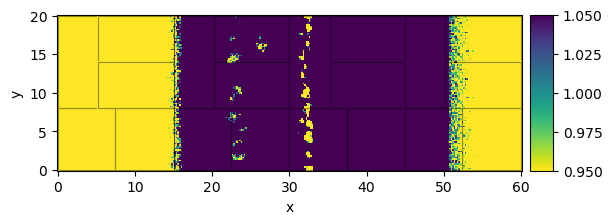

In [10]:
fig, ax = plt.subplots()

Ni.plot(qty="value",
        cmap="viridis_r",
        vmin=0.95,
        vmax=1.05,
        plot_patches=True,
        lw=[0.8],
        ax=ax,
       )

In [ ]:
E = run.GetE(time)

In [ ]:
E.plot(qty="Ex",
        cmap="viridis_r",
        vmin=-0.2,
        vmax=+0.2,
       )

In [ ]:
file = "ions_pop_beam_domain.h5"
times = get_times_from_h5(path_to_run+file)
print(times)

In [ ]:
ions = run.GetParticles(time, ["beam", "main"])
# ions = run.GetParticles(time, ["main"])

In [ ]:
for ilvl, lvl in ions.levels(time).items():
    for patch in lvl.patches:
        print(patch.patch_datas.keys())
        break

In [ ]:
fig, ax = plt.subplots()

vmin, vmax = -3.0,+8.0

ions.dist_plot(axis=("x", "Vx"),
    ax = ax,
    norm = 0.4,
    finest=True,
    gaussian_filter_sigma = (1,1) ,
    vmin=vmin,vmax=vmax,
    dv=0.05,
    title="time = {:.1f}".format(time),
    xlabel = "",
    ylabel = ""
    )

Each `PatchLevel` itself has a collection of patches obtainable as a simple list. Here we print the patch ID for each patch of each level.\
The patch ID is just MPI_Rank#localPatchID

In [ ]:
for ilvl, lvl in E.levels(time).items():
    for patch in lvl.patches:
        print(patch.id)
        # break  # break not to have a huge list printed

Let's practice a bit and for instance count how many patches there are in each level:

In [ ]:
count = {}
for ilvl, lvl in E.levels(time).items():
    count[ilvl] = len(lvl.patches)
print(count)

and now a more complex example, let's make a histogram of the number of cells per level\
Here we use the fact that a `Patch` is an object that has a `Box` representing its domain, for which the number of cells can be obtained with the method `nCells()`

In [ ]:
cells = {ilvl:[] for ilvl in E.levels(time).keys()}
for ilvl, lvl in E.levels(time).items():
    for patch in lvl.patches:
        cells[ilvl] += [ patch.box.nCells() ]
print(cells)
    
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(10,4))
for ilvl,ax in enumerate((ax1,ax2, ax3)):
    ax.hist(cells[ilvl], bins=10)
    ax.set_title(f"Level {ilvl}")
    #ax.set_xscale("log")
    ax.set_yscale("log")
fig.tight_layout()